## Import important packages

In [98]:
# import important packages
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [99]:
## connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# to define the path for train and test images
train_path="/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_path="/content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [101]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Dataset creation

In [102]:
batch_size = 32
img_height = 180
img_width = 180

In [103]:
#Train Data Set Creation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [104]:
# Validation Data Set Creation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [105]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualizing the data

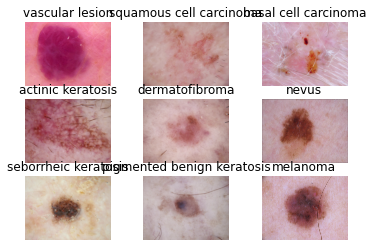

In [106]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

In [107]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Building & training

### Model 0

In [108]:
###Creating the model
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [109]:
### Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
### Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 92ms/step - loss: 2.5617 - accuracy: 0.2143 - val_loss: 1.9937 - val_accuracy: 0.3468
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.8345 - accuracy: 0.3292 - val_loss: 1.7913 - val_accuracy: 0.4072
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6305 - accuracy: 0.4252 - val_loss: 1.5263 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4759 - accuracy: 0.4810 - val_loss: 1.6010 - val_accuracy: 0.4340
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4045 - accuracy: 0.5117 - val_loss: 1.4129 - val_accuracy: 0.5459
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.2745 - accuracy: 0.5608 - val_loss: 1.4724 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.1832 - accuracy: 0.5854 - val_loss: 1.4387 - val_accuracy: 0.5145
Epoch 8/20
5

In [111]:
### To get the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

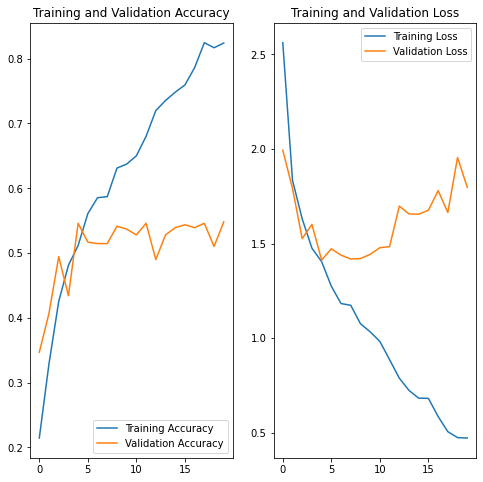

In [112]:
### Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Result of model 0
Validation accuracy is less than training accuracy, this indicates overfitting. We can add more layers to improve the accuracy by trying to extract more features.


### Model 1

In [113]:
###Creating the model
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [114]:
### Compiling the model
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [115]:
### Training the model
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 20s 95ms/step - loss: 2.0935 - accuracy: 0.1802 - val_loss: 2.0495 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 91ms/step - loss: 2.0201 - accuracy: 0.1858 - val_loss: 1.9712 - val_accuracy: 0.2260
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 1.9046 - accuracy: 0.2857 - val_loss: 1.7916 - val_accuracy: 0.3065
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 1.7922 - accuracy: 0.3265 - val_loss: 1.6891 - val_accuracy: 0.3826
Epoch 5/20
56/56 [==============================] - 5s 91ms/step - loss: 1.6681 - accuracy: 0.3962 - val_loss: 1.6402 - val_accuracy: 0.4027
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 1.6658 - accuracy: 0.3945 - val_loss: 1.7989 - val_accuracy: 0.3221
Epoch 7/20
56/56 [==============================] - 5s 91ms/step - loss: 1.6469 - accuracy: 0.4040 - val_loss: 1.5697 - val_accuracy: 0.4094
Epoch 8/20
5

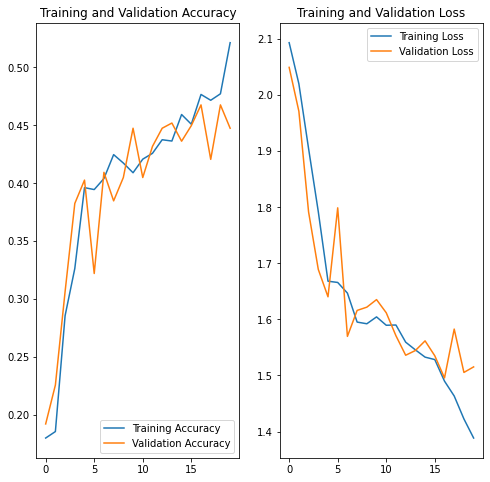

In [116]:
### Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Although the model accuracy for Train data set and Validation set has reduced this model is better because there is no overfit.

## Rectifying the class imbalance using data augmentation

In [117]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

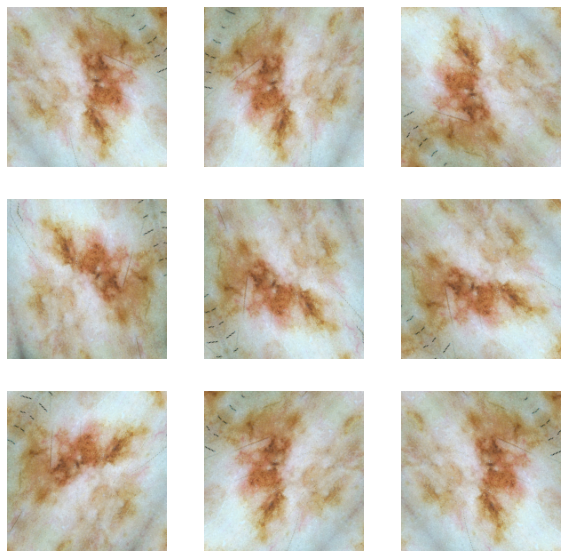

In [118]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

In [119]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [120]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [121]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 97ms/step - loss: 2.1949 - accuracy: 0.1819 - val_loss: 2.0816 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 93ms/step - loss: 2.0430 - accuracy: 0.1886 - val_loss: 2.0314 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 93ms/step - loss: 2.0277 - accuracy: 0.1920 - val_loss: 2.0286 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 5s 93ms/step - loss: 2.0062 - accuracy: 0.2221 - val_loss: 1.9272 - val_accuracy: 0.3065
Epoch 5/20
56/56 [==============================] - 5s 93ms/step - loss: 1.9117 - accuracy: 0.2846 - val_loss: 1.7865 - val_accuracy: 0.3557
Epoch 6/20
56/56 [==============================] - 5s 93ms/step - loss: 1.9450 - accuracy: 0.2640 - val_loss: 1.9687 - val_accuracy: 0.2416
Epoch 7/20
56/56 [==============================] - 5s 94ms/step - loss: 1.8420 - accuracy: 0.3170 - val_loss: 1.9875 - val_accuracy: 0.2237
Epoch 8/20
56

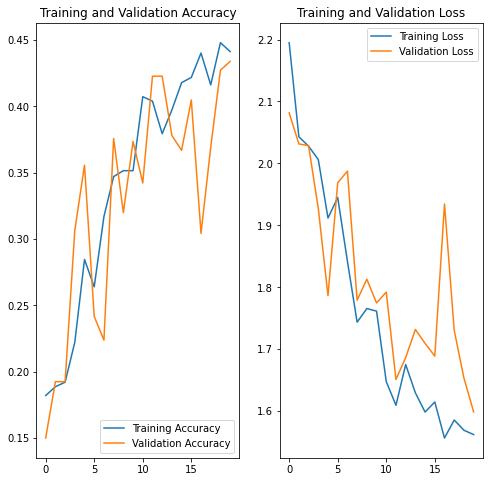

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model accuracy for Train data and Validation setset has gone up. This is a much better model compared to the previous two models as there seems to be No Overfit with the training accuracy and validation accuracy at 48%. Data Augmentation has improved the model performance.

## Checking for Class Imbalance

In [123]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


1. The class with least number of samples is Seborrheic Keratosis with 77
2. The class that dominates the number of samples is Pigmented Benign Keratosis with sample size of 462. 

 Hence there is class imbalance


## Using Augmentor for Class Imbalance Treatment

In [124]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+'/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17A61580D0>: 100%|██████████| 500/500 [00:21<00:00, 23.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17A6124E50>: 100%|██████████| 500/500 [00:19<00:00, 25.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F177A5D2990>: 100%|██████████| 500/500 [00:21<00:00, 23.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F177AF84E10>: 100%|██████████| 500/500 [01:44<00:00,  4.78 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F178E3A6750>: 100%|██████████| 500/500 [01:38<00:00,  5.09 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F17A61007D0>: 100%|██████████| 500/500 [00:19<00:00, 26.17 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F17354CF9D0>: 100%|██████████| 500/500 [00:45<00:00, 10.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F178E8E3E50>: 100%|██████████| 500/500 [00:20<00:00, 24.18 Samples/s]


In [126]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [127]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [128]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [129]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [130]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    directory_out =train_path+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


We have added 500 images to all the classes to maintain some class balance and improve training process. The Augmentor has helped decrease the imbalance in class images.

## Model Training with Augmented Data

In [131]:
batch_size = 32
img_height = 180
img_width = 180

In [132]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [133]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## Model 3

In [134]:
### Creating the Model
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [135]:
### Compiling the Model
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [136]:
### Training the Model
epochs = 50
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 41s 233ms/step - loss: 2.4937 - accuracy: 0.2020 - val_loss: 1.8897 - val_accuracy: 0.3267
Epoch 2/50
169/169 [==============================] - 34s 193ms/step - loss: 1.6034 - accuracy: 0.3763 - val_loss: 1.5972 - val_accuracy: 0.3890
Epoch 3/50
169/169 [==============================] - 33s 189ms/step - loss: 1.4222 - accuracy: 0.4649 - val_loss: 1.2705 - val_accuracy: 0.5323
Epoch 4/50
169/169 [==============================] - 34s 192ms/step - loss: 1.2634 - accuracy: 0.5215 - val_loss: 1.1658 - val_accuracy: 0.5598
Epoch 5/50
169/169 [==============================] - 33s 187ms/step - loss: 1.1481 - accuracy: 0.5660 - val_loss: 1.1125 - val_accuracy: 0.5805
Epoch 6/50
169/169 [==============================] - 33s 187ms/step - loss: 1.0264 - accuracy: 0.6198 - val_loss: 0.9748 - val_accuracy: 0.6377
Epoch 7/50
169/169 [==============================] - 33s 187ms/step - loss: 0.9193 - accuracy: 0.6573 - val_loss: 0.9770 - val_ac

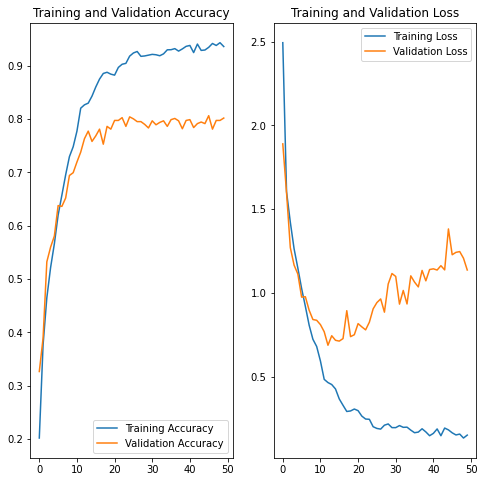

In [137]:
### Visualizing the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Result:



1. The training accuracy seems to be nearly ~90%.
2. The validation accuracy is nearly ~80%.
3. Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.
4. Much better models could be built or tried out using more epochs and more layers.





